In [1]:
from PIL import Image, ImageDraw, ImageFont
import string
import random
from random import randint
import cv2
import os
import numpy as np
import keras
import matplotlib.pylab as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Reshape
from keras.utils import np_utils
from keras.models import load_model
from keras.preprocessing import image
from sklearn import preprocessing
import matplotlib.pylab as plt

/Users/carolinedavis/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/carolinedavis/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Users/carolinedavis/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/carolinedavis/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/carolinedavis/anaconda3/lib/python3.6/importli

In [2]:
chars = string.ascii_uppercase + string.ascii_lowercase + string.digits
num_classes = len(chars) 
max_car = 10
samples_per_label = 2
input_shape = (30, 100, 1)
batch = 32
epoch = 10
font = ImageFont.load_default()

In [3]:
# generates random string of length 10 to be used as label 
def string_generator(chars= chars):
    labels = []
    for i in range(0,8000):
        size = 10
        label = ''.join(random.choice(chars) for _ in range(size))
        labels.append(label)
    return labels

In [4]:
labels = string_generator()
labels_length = len(labels)
labels[:5]

['gNHY9yNE2a', '8KU0PTBt7g', 'hVITB4urRb', 'fAOBvx2sRg', 'QwPatnulDf']

In [5]:
# generates image from random string for each font 
def make_random_image(label):
    img = Image.new('RGB', (100, 30), color = (255, 255, 255))
    string = label
    d = ImageDraw.Draw(img)
    d.text((10,10), string, font = font, fill=(0, 0, 0))
    img = np.asarray(img)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    return img

In [6]:
# creates samples with image and label 
def generate_samples():
    random.seed()
    results = [] 
    for label in range(labels_length):
        target = labels[label]
        print('GENERATING SAMPLES')
        for i in range(samples_per_label):
            sample = make_random_image(target)
            results.append((sample, target))
    return results

In [7]:
samples = generate_samples()

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING SAMPLES
GENERATING S

In [8]:
len(samples)

16000

In [9]:
## split test and train 
def prepare_datasets(samples):
    random.shuffle(samples)
    training_set = samples[:round(len(samples) / 10 * 9)]
    test_set = samples[round(len(samples) / 10 * 9):]
    training_data = [i[0] for i in training_set]
    training_data = np.asarray(training_data).astype('float32')
    training_data = np.expand_dims(training_data, axis=3)
    training_data /= 255
    training_labels = [i[1] for i in training_set]
    training_labels = np.asarray(training_labels)
    print('TRAINING DATA SHAPE', training_data.shape)
    print('TRAINING LABELS SHAPE', training_labels.shape)
    test_data = [i[0] for i in test_set]
    test_data = np.asarray(test_data).astype('float32')
    test_data = np.expand_dims(test_data, axis=3)
    test_data /= 255
    test_labels = [i[1] for i in test_set]
    test_labels = np.asarray(test_labels)
    print('TEST DATA SHAPE', test_data.shape)
    print('TEST LABELS SHAPE', test_labels.shape)
    return training_data, training_labels, test_data, test_labels

In [10]:
training_data, training_labels, test_data, test_labels = prepare_datasets(samples)

TRAINING DATA SHAPE (14400, 30, 100, 1)
TRAINING LABELS SHAPE (14400,)
TEST DATA SHAPE (1600, 30, 100, 1)
TEST LABELS SHAPE (1600,)


In [11]:
## use binarizer to encode labels 
lb = preprocessing.LabelBinarizer()
## transform list of chars to array
chararray = list(chars)
## fit transformer with array of all possible characters 
lb.fit(chararray)

LabelBinarizer(neg_label=0, pos_label=1, sparse_output=False)

In [12]:
## encodes labels 
def label_encoder(labels):
    encoded_labels = []
    labels = list(labels)
    for label in labels:
        label = list(label)
        label = lb.transform(label)
        encoded_labels.append(label)
    return encoded_labels

In [13]:
training_labels = label_encoder(training_labels)
test_labels = label_encoder(test_labels)

In [14]:
def instantiate_model():
    print('COMPILING MODEL')
    model = Sequential()
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu', input_shape=input_shape))
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1280, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(620, activation='softmax'))
    model.add(Reshape((10, 62)))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [15]:
classifier = instantiate_model()

COMPILING MODEL
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 98, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 96, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 48, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 48, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 19968)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1280)              25560320  
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0    

In [16]:
## confirm input/output shape match actual shape 
print(training_data.shape)
print(np.asarray(training_labels).shape)
print(classifier.input_shape)
print(classifier.output_shape)

(14400, 30, 100, 1)
(14400, 10, 62)
(None, 30, 100, 1)
(None, 10, 62)


In [ ]:
history = classifier.fit(training_data, np.asarray(training_labels), batch_size=batch, epochs=epoch, verbose=1)

Epoch 1/10
14400/14400 [==============================] - 300s 21ms/step - loss: 2.7738 - acc: 0.2930
Epoch 2/10
14400/14400 [==============================] - 307s 21ms/step - loss: 1.0309 - acc: 0.6904
Epoch 3/10
14400/14400 [==============================] - 310s 22ms/step - loss: 0.7384 - acc: 0.7736
Epoch 4/10
14400/14400 [==============================] - 334s 23ms/step - loss: 0.6042 - acc: 0.8137
Epoch 5/10
14400/14400 [==============================] - 315s 22ms/step - loss: 0.5218 - acc: 0.8374
Epoch 6/10
14400/14400 [==============================] - 319s 22ms/step - loss: 0.4587 - acc: 0.8560
Epoch 7/10
14400/14400 [==============================] - 313s 22ms/step - loss: 0.4163 - acc: 0.8695
Epoch 8/10
 9888/14400 [===================>..........] - ETA: 1:44 - loss: 0.3797 - acc: 0.8819

In [25]:
score = classifier.evaluate(test_data, np.asarray(test_labels), verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.20890297794342041
Test accuracy: 0.9475999979972839


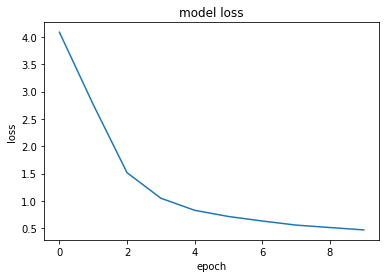

In [26]:
## plot loss- categorical crossentropy 
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

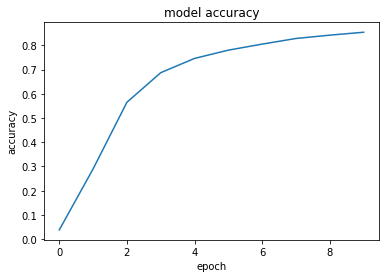

In [27]:
## plot accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [28]:
## saves model weights and model architecture; can be loaded to make predictions or continue training 
classifier.save('default.h5')